Abdelkader Habel 

#QUESTION


I am interested in knowing if the population size in each state in the United States affects murder rates. 

#LOADING DATA

In [ ]:
#@title Accessing the Dataset and renaming the columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('precision', 3)
 
# Loading data
crimes_data=pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/state_crime/state_crime.csv"
).rename(
    columns={'Data.Population':'Population',
             'Data.Rates.Property.All':'Rate Property',
             'Data.Rates.Property.Burglary':'Rate Burglary',
             'Data.Rates.Property.Larceny':'Rate Larceny',
             'Data.Rates.Property.Motor':'Rate Motor',
             'Data.Rates.Violent.All':'Rate All Violent',
             'Data.Rates.Violent.Assault':'Assault Rate',
             'Data.Rates.Violent.Murder':'Murder Rate',
             'Data.Rates.Violent.Robbery':'Robbery Rate',
             'Data.Rates.Violent.Assault':'Assault Rate',
             'Data.Rates.Violent.Rape':'Rape Rate',
             'Data.Totals.Property.All':'Total Property',
             'Data.Totals.Property.Burglary':'Total Burglary',
             'Data.Totals.Property.Larceny':'Total Larceny',
             'Data.Totals.Property.Motor':'Total Motor',
             'Data.Totals.Violent.All':'Total Violent',
             'Data.Totals.Violent.Assault':'Total Assault',
             'Data.Totals.Violent.Murder':'Total Murder',
             'Data.Totals.Violent.Rape':'Total Rape',
             'Data.Totals.Violent.Robbery':'Total Robbery'
             }
)
crimes_data

,State,Year,Population,Rate Property,Rate Burglary,Rate Larceny,Rate Motor,Rate All Violent,Assault Rate,Murder Rate,Rape Rate,Robbery Rate,Total Property,Total Burglary,Total Larceny,Total Motor,Total Violent,Total Assault,Total Murder,Total Rape,Total Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,179.8,1902.6,300.6,1500.9,222.1,10.1,2.7,29.5,21.3,1054,11151,1762,8797,1302,59,16,173,125
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,35.0,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,45.4,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,42.1,17.3,10313,1525,7949,839,1226,870,13,243,100


#ANALYSIS


I want to take the average of all values for the entire period covered (1960-2012).

In [ ]:
#@title Keeping the states and dropping other entries
grouped=crimes_data.groupby(['State']).mean() # gives the mean of all values in the table per state
grouped['Year']=grouped['Year'].map(lambda Year: '1960-2012') #Changes value inside cell from average of the years to the period
grouped['Population']=grouped['Population'].map(lambda Population: Population/1000000) #Gives average pop in millions from 1960-2012
# grouped
country_states=grouped.drop('United States')


I want a bar plot, just to be able to easily see all the states and their rates. It will not answer my question but will allow me to see the situation better. 

<BarContainer object of 52 artists>

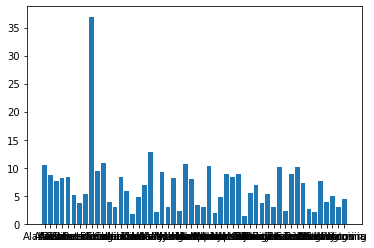

In [ ]:
plt.bar(grouped.index,grouped['Murder Rate'])

This graph is not readable, not good looking either. 

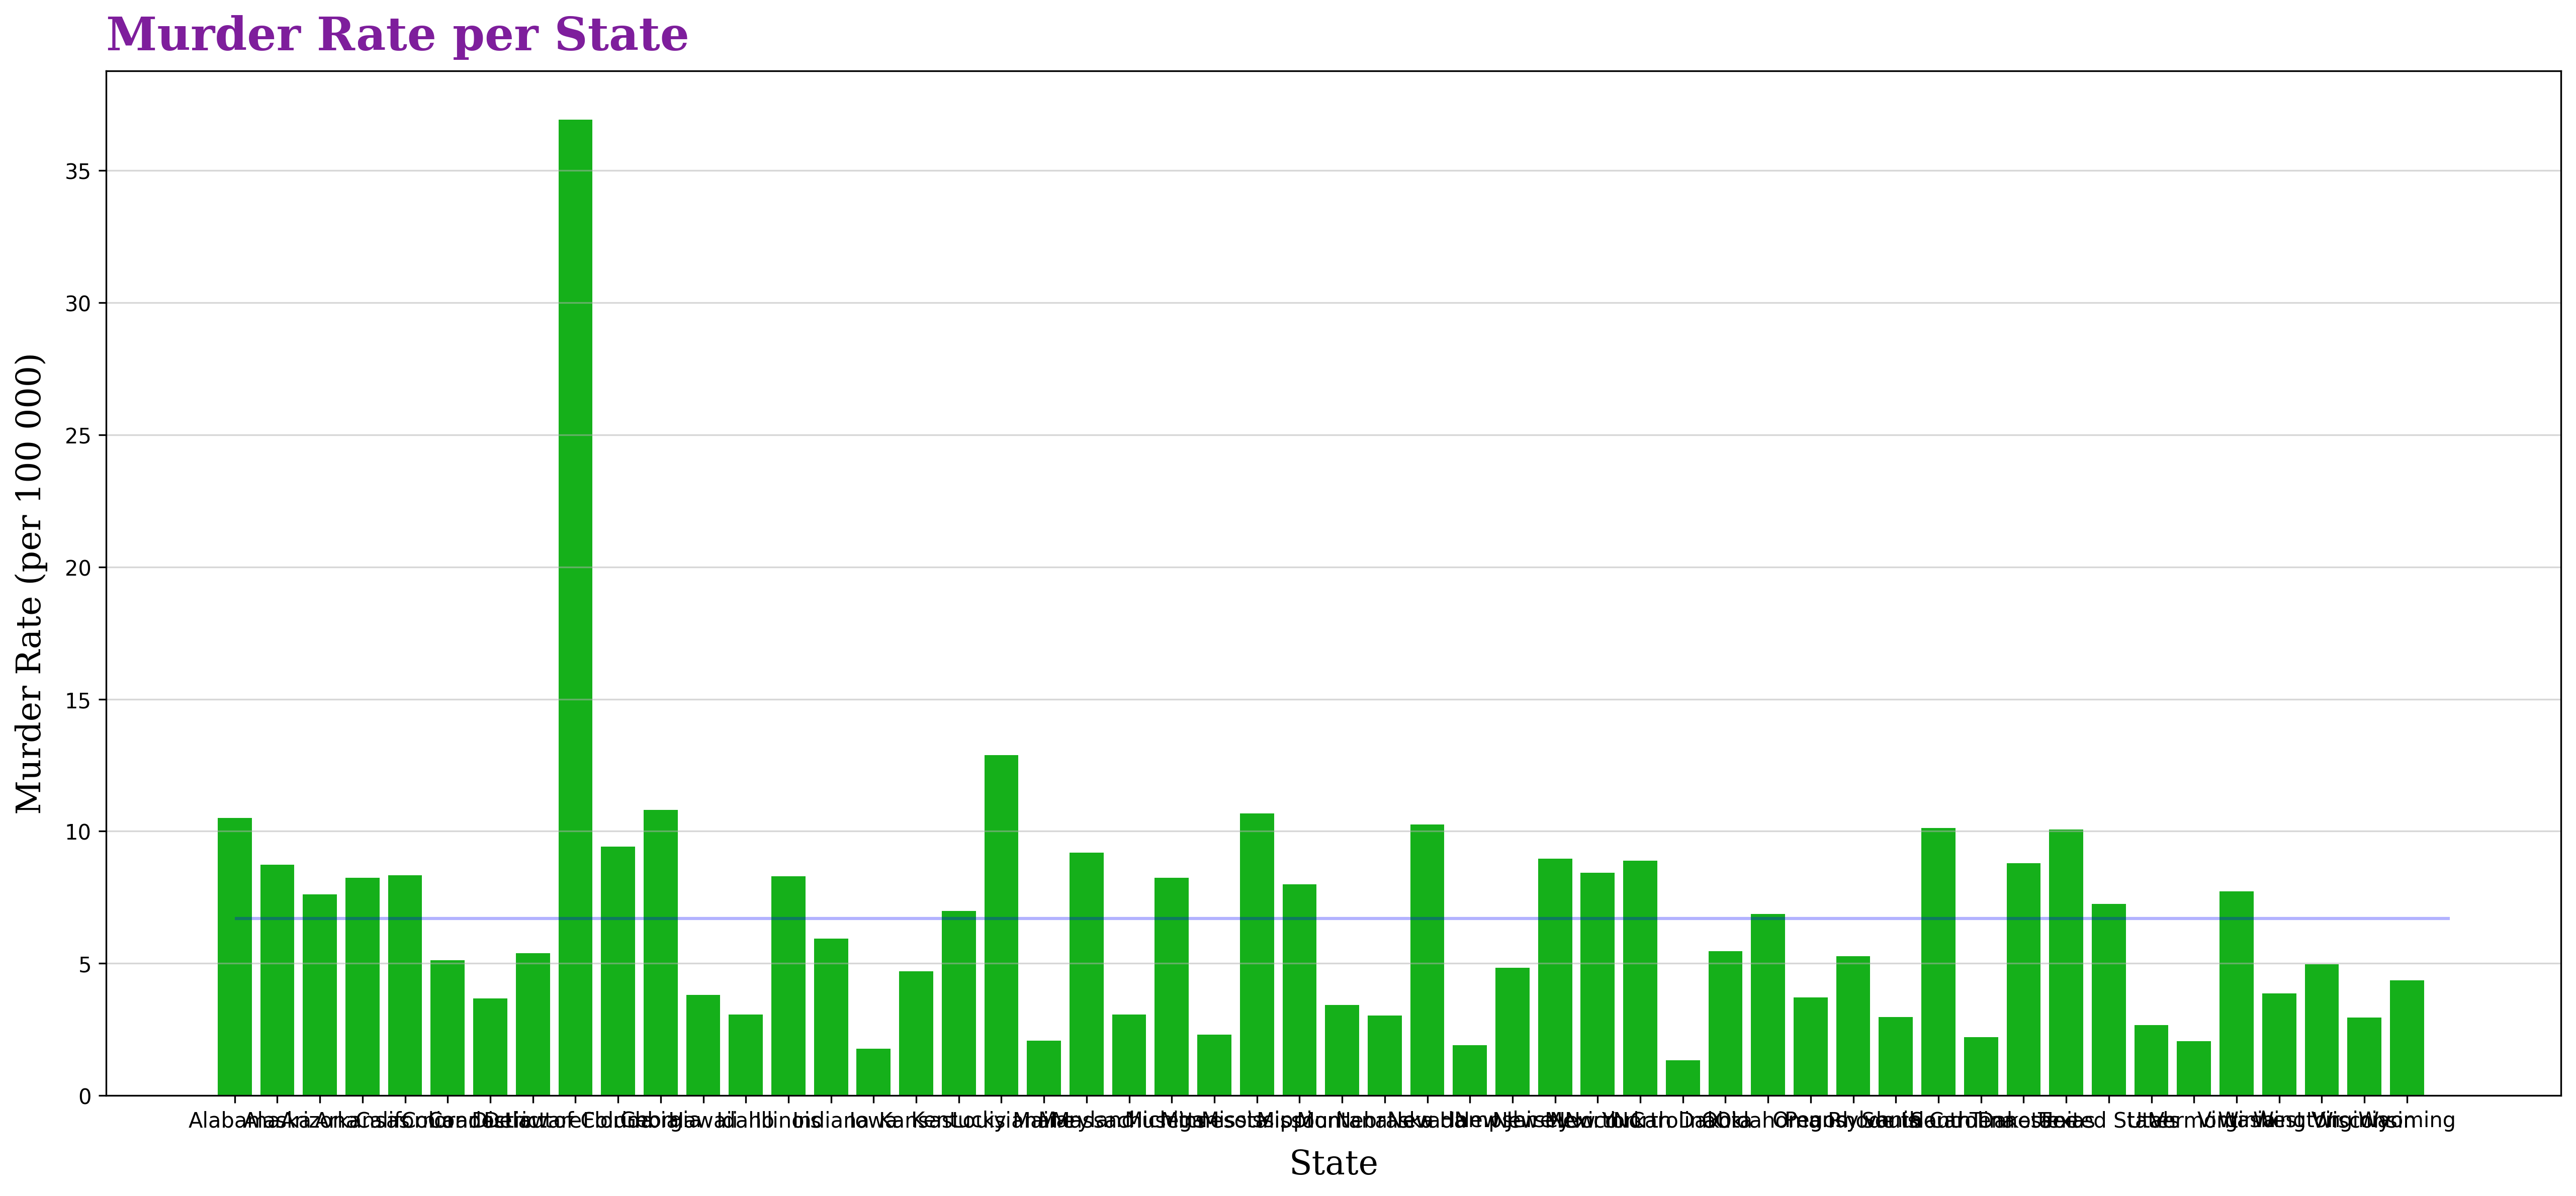

In [ ]:
#@title More readable graph
# Bar plot to see rates per state
plt.figure(figsize=[21,9], dpi=300)


plt.title(
    "Murder Rate per State", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:purple',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
# plt.xticks(grouped.index,rotation=90)
plt.bar(grouped.index, grouped['Murder Rate'], color="xkcd:green")
plt.xlabel(
    "State", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.ylabel(
    "Murder Rate (per 100 000)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='y', alpha=0.5)
plt.hlines(grouped['Murder Rate'].mean(),0,52, alpha=0.3,colors='blue') #Plots a line for the average rate of murder of all states
plt.show()


Having all the states in order would be better. Using the state abreviations would allow to distinguish which bar is which state on the x axis. ex: California becomes CA. Also added the country average just to have more info. 



In [ ]:
#@title Using state abbreviations
codes=pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
usa_code={'State':'United States','Abbreviation':'USA'}
state_code=codes.append(usa_code,ignore_index=True).set_index('State')
# state_code
ordered=grouped.sort_values(by='Murder Rate')
ordered['Abbreviation']=state_code['Abbreviation']

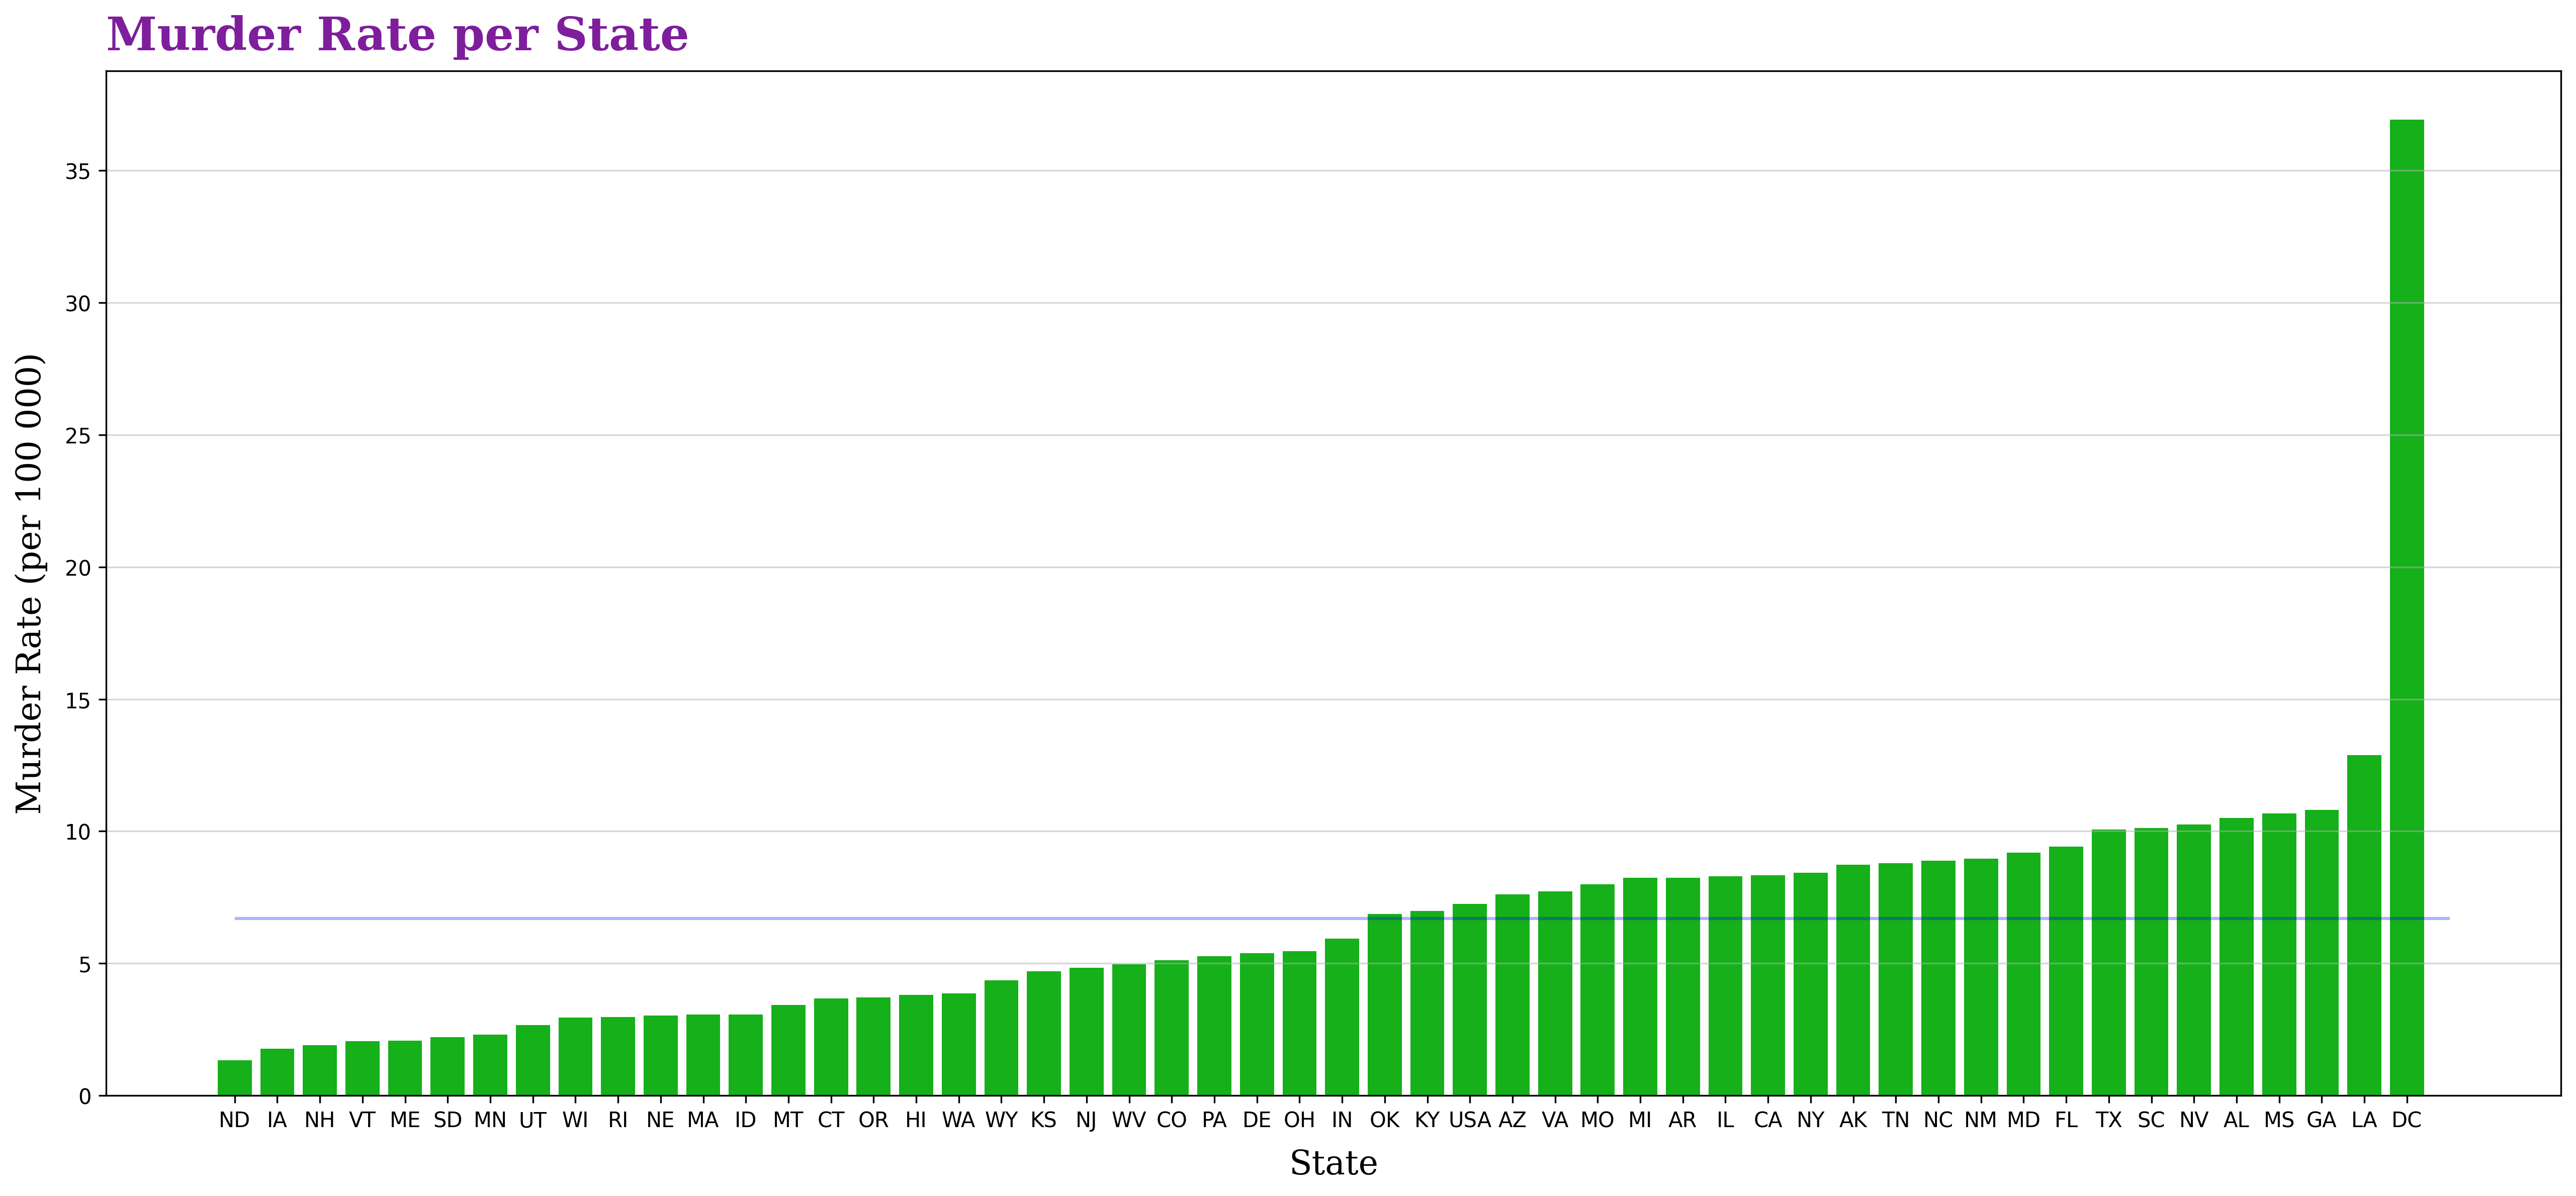

In [ ]:
#@title Ordered graph with state abbreviations
# Bar plot to see rates per state
plt.figure(figsize=[21,9], dpi=300)


plt.title(
    "Murder Rate per State", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:purple',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)

plt.bar(ordered['Abbreviation'], ordered['Murder Rate'], color="xkcd:green", )
plt.xlabel(
    "State", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Murder Rate (per 100 000)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='y', alpha=0.5)
plt.hlines(ordered['Murder Rate'].mean(),0,52,alpha=0.3,colors='blue') #Plots a line for the average rate of murder of all states
plt.show()


#VISUALIZATION


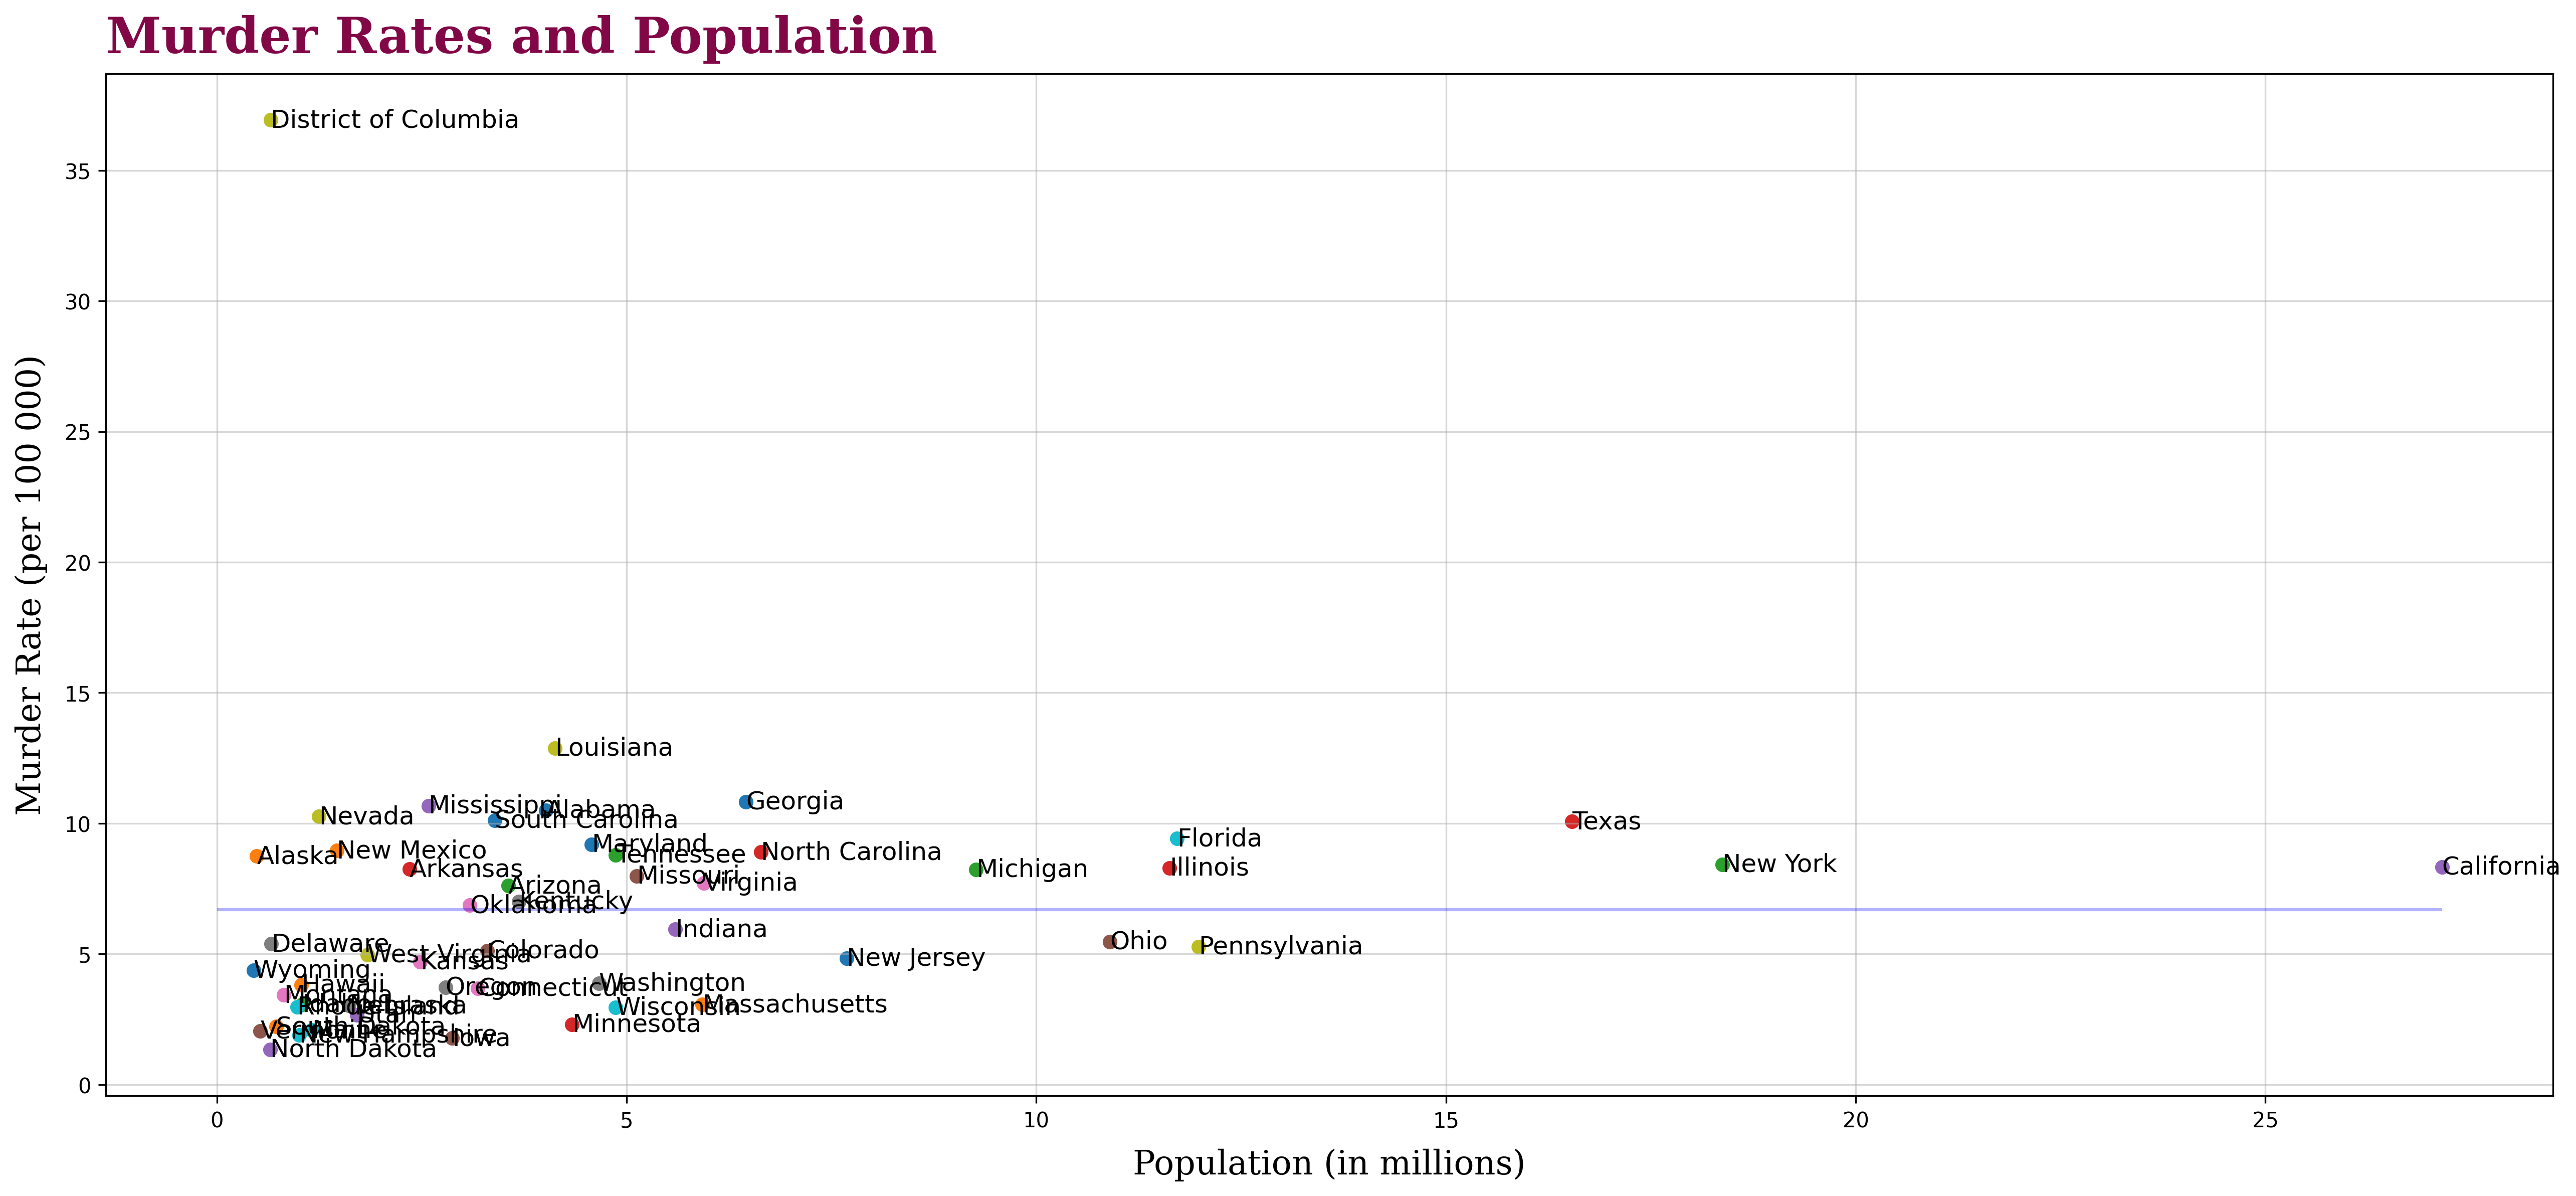

In [ ]:
#@title Plot of all States and Nation murder rates average
title_font = {
    'family': 'serif',
    'color':  'xkcd:red purple',
    'weight': 'bold',
    'size': 24,
}
label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Murder Rates and Population", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Population (in millions)",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Murder Rate (per 100 000)",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)

colours = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5","#ffed6f"]

#Plot
for i, name in enumerate(country_states.index):
  plt.scatter(country_states.at[name, "Population"], country_states.at[name, "Murder Rate"])#, c=colours[i], s=0.5*math.sqrt(data_2012.at[name, "Population"]))
  plt.annotate(name, xy=(country_states.at[name, "Population"], country_states.at[name, "Murder Rate"]),fontsize=12, verticalalignment="center")
plt.hlines(grouped['Murder Rate'].mean(),0,grouped['Population']['California'],alpha=0.3,colors='blue') #Plots a line for the average rate of murder of all states
plt.show()

From this graph, we can see that there does not seem to be a correlation between population and murder rates.The light blue line in the graph is the average rate for all states combined.  The largest states in terms of population, like California and New York are not as high on the graph as they would have been if there was a correlation between these two elements. All smaller states are too close to be seen well, we will remove the big states of California, Texas and New York. 

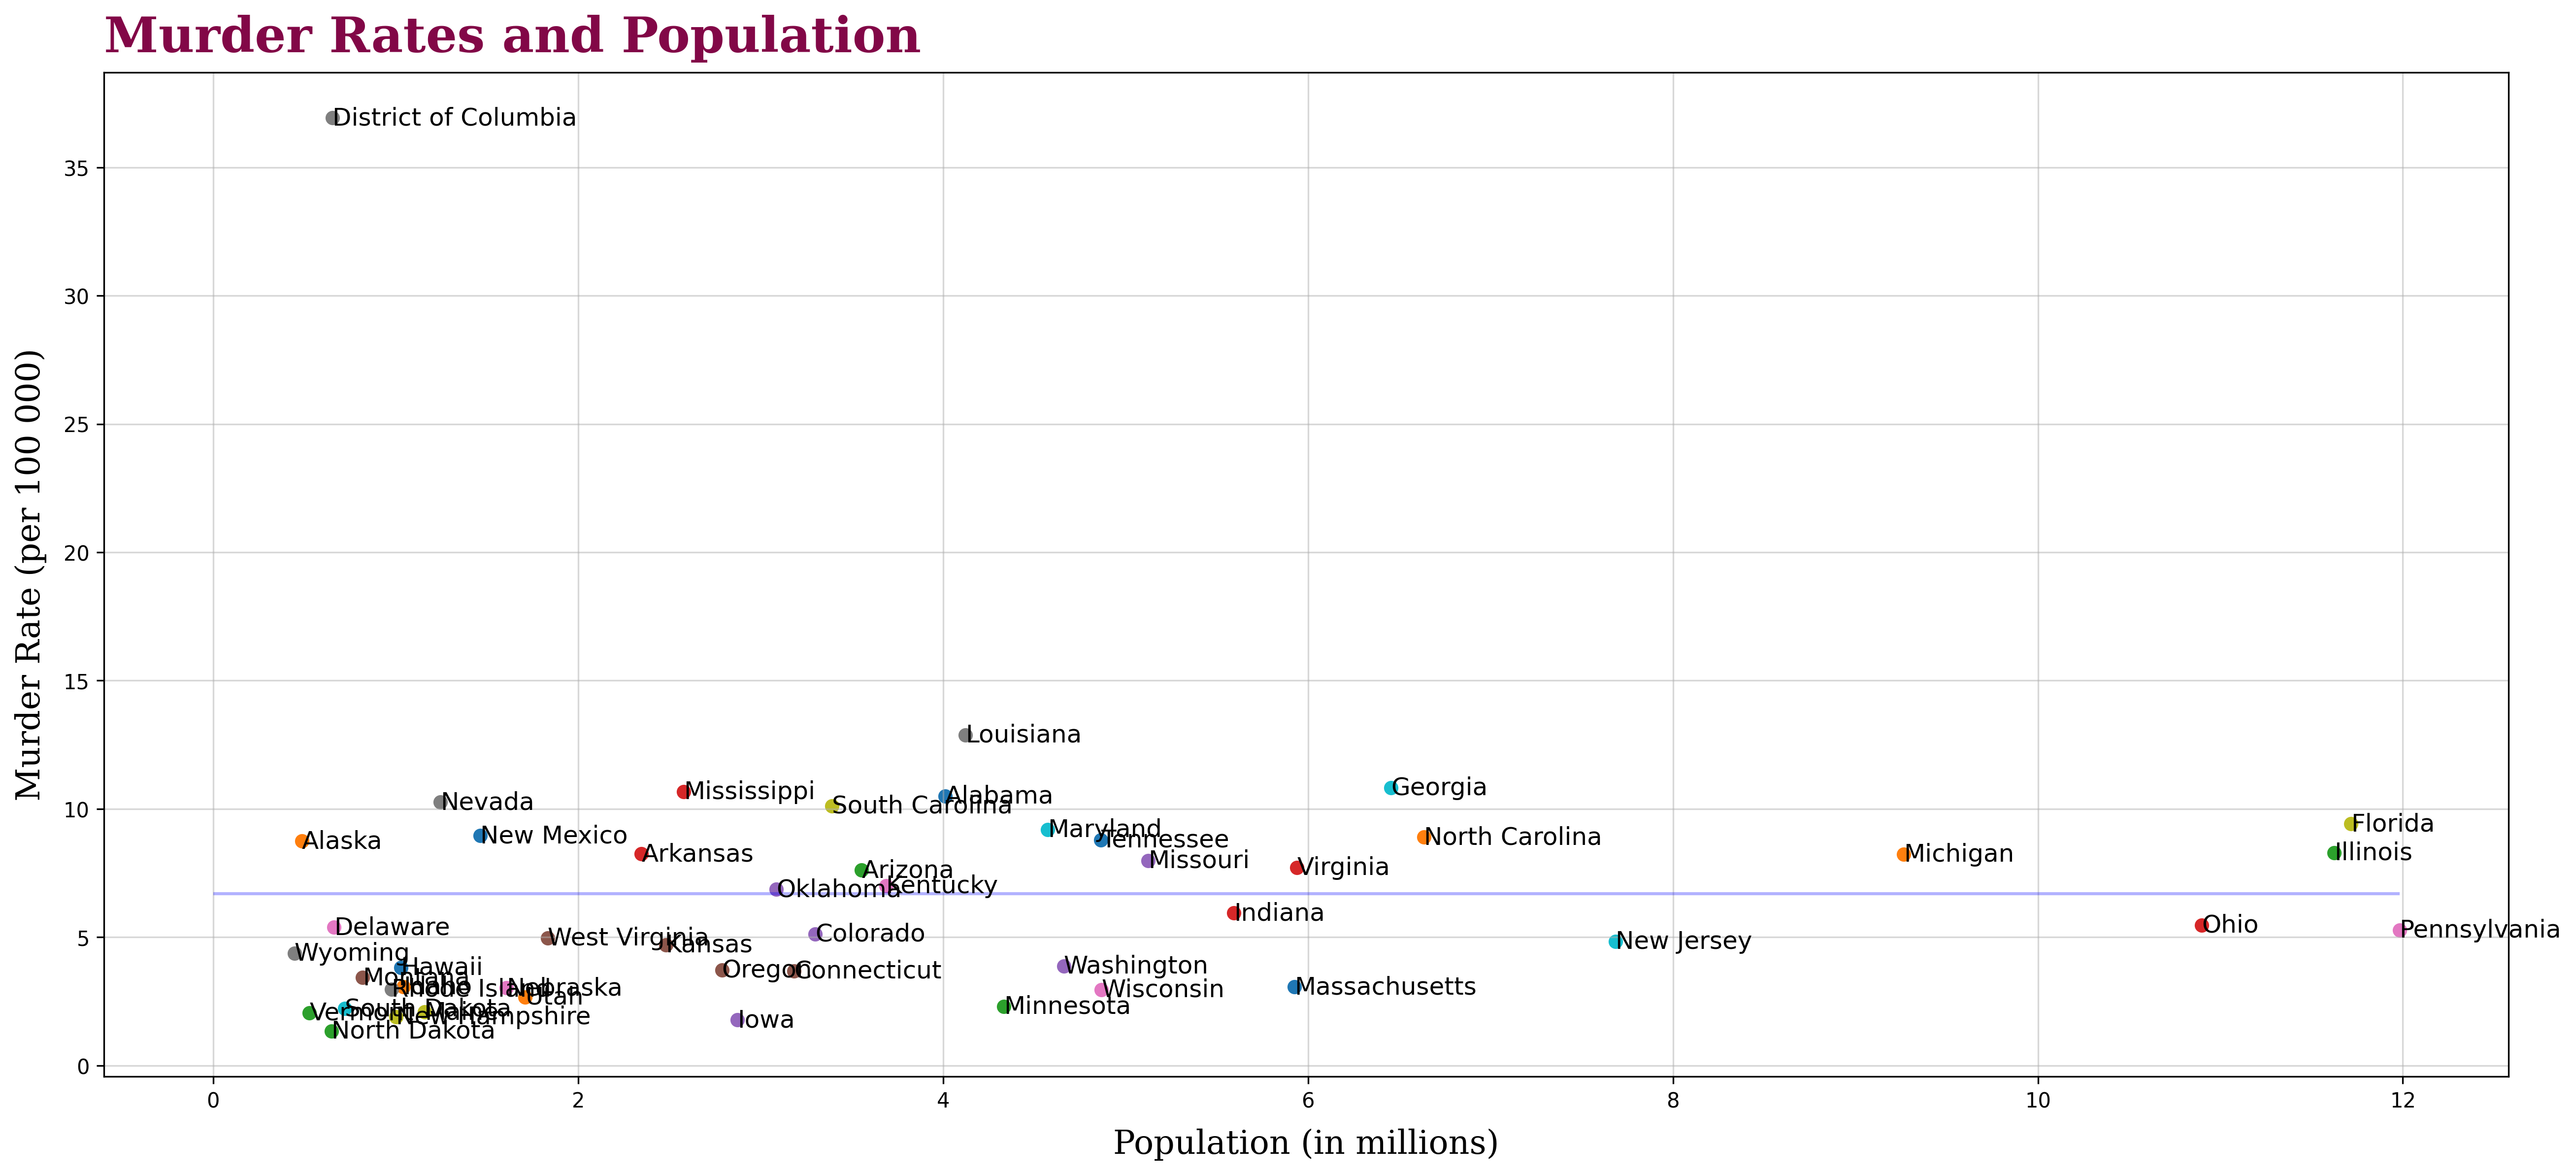

In [ ]:
#@title Dropping the most populous states
small_states=country_states.drop(['Texas','California','New York']) 

# Scatter without NY CA TX
title_font = {
    'family': 'serif',
    'color':  'xkcd:red purple',
    'weight': 'bold',
    'size': 24,
}
label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Murder Rates and Population", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Population (in millions)",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Murder Rate (per 100 000)",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)

colours = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5","#ffed6f"]

#Plot
for i, name in enumerate(small_states.index):
  plt.scatter(small_states.at[name, "Population"], small_states.at[name, "Murder Rate"])
  plt.annotate(name, xy=(small_states.at[name, "Population"], small_states.at[name, "Murder Rate"]),fontsize=12, verticalalignment="center")
plt.hlines(grouped['Murder Rate'].mean(),0,grouped['Population']['Pennsylvania'],alpha=0.3,colors='blue') #Plots a line for the average rate of murder of all states
plt.show()

This last graph is even better at showing that there is no correlation between population and murder rates. What is noticeable is that the District of Columbia has had rates that are significantly higher than what the rest of the country has had. If i remove it, the graph will be more readable. 

FINAL GRAPH UNDER

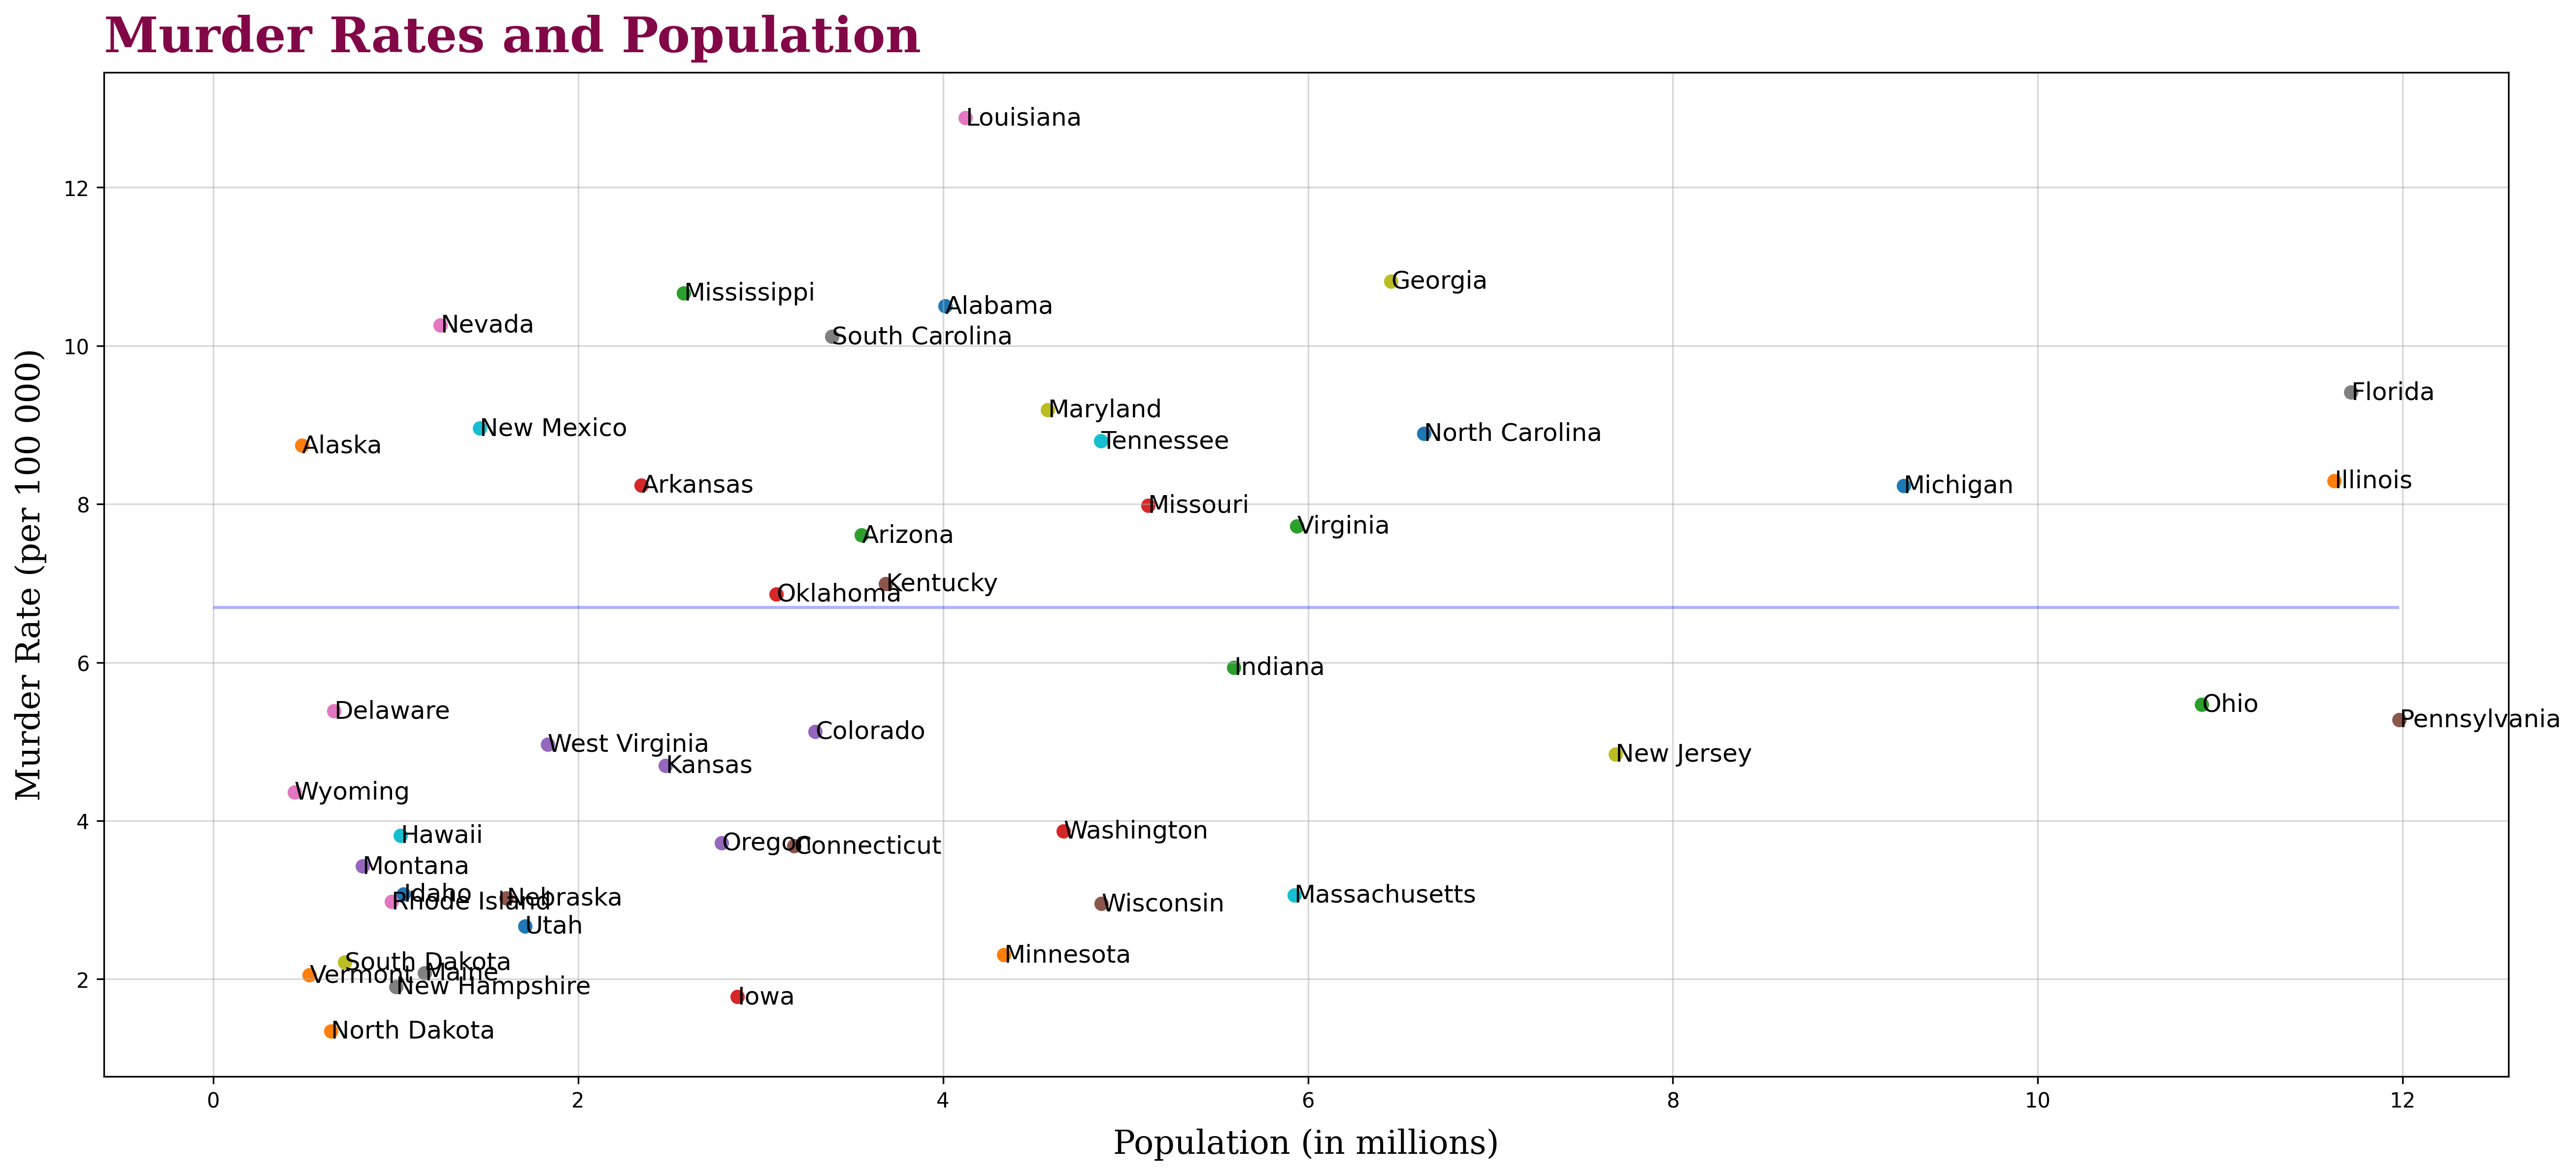

In [ ]:
#@title Final graph with the smaller states
small_states=country_states.drop(['New York','District of Columbia','Texas','California']) 

# Scatter without DC FINAL GRAPH
title_font = {
    'family': 'serif',
    'color':  'xkcd:red purple',
    'weight': 'bold',
    'size': 24,
}
label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Murder Rates and Population", 
    fontdict=title_font,
    loc='left',
    pad=10
)
plt.xlabel(
    "Population (in millions)",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Murder Rate (per 100 000)",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='both', alpha=0.5)

colours = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5","#ffed6f"]

#Plot
for i, name in enumerate(small_states.index):
  plt.scatter(small_states.at[name, "Population"], small_states.at[name, "Murder Rate"])
  plt.annotate(name, xy=(small_states.at[name, "Population"], small_states.at[name, "Murder Rate"]),fontsize=12, verticalalignment="center")
plt.hlines(grouped['Murder Rate'].mean(),0,grouped['Population']['Pennsylvania'],alpha=0.3,colors='blue') #Plots a line for the average rate of murder of all states
plt.show()

FINAL ANSWER: THERE IS NO CORRELATION BETWEEN POPULATION AND MURDER RATES DURING THE 1960-2012 TIME FRAME. 